EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r'C:\Users\pbacskai\OneDrive - CEE Telco Group\Documents\GitHub\ecommerce-shopper-behavior\data\raw\e_commerce_shopper_behaviour_and_lifestyle.csv', encoding = 'latin1', sep = ',')

In [5]:
df.head()

,user_id,age,gender,country,urban_rural,income_level,employment_status,education_level,relationship_status,has_children,...,cart_items_average,checkout_abandonments_per_month,purchase_conversion_rate,app_usage_frequency,notification_response_rate,account_age_months,last_purchase_date,social_sharing_frequency,premium_subscription,return_rate
0,1,56,Female,Germany,Suburban,90860,Self-employed,Associate Degree,Single,0,...,10,2,62,7,74,19,2025-06-22,6,1,50
1,2,69,Male,Japan,Suburban,35423,Unemployed,Bachelor,Single,1,...,5,7,54,5,23,8,2026-07-25,3,0,37
2,3,46,Female,India,Urban,21467,Self-employed,Associate Degree,Married,1,...,3,3,33,7,12,13,2026-02-26,6,0,53
3,4,32,Male,Canada,Urban,41770,Self-employed,Bachelor,Widowed,0,...,5,9,26,4,19,9,2026-10-27,7,0,98
4,5,60,Female,Japan,Urban,183882,Employed,Associate Degree,Widowed,1,...,8,0,18,7,30,3,2026-06-23,3,0,86


In [91]:
date_cols = ["last_purchase_date"]

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors="coerce")

In [92]:
summary = pd.DataFrame({
    "dtype": df.dtypes.astype(str),
    "non_null": df.notna().sum(),
    "missing": df.isna().sum(),
    "missing_pct": df.isna().mean().round(3),
    "unique_items": df.nunique(),
    "most_frequent": df.apply( lambda s: s.mode().iloc[0] if not s.mode().empty else None )
}).sort_values("missing_pct", ascending=False)

In [93]:
summary.reset_index(names="col_name", inplace=True)

In [94]:
summary

,col_name,dtype,non_null,missing,missing_pct,unique_items,most_frequent
0,user_id,int64,1000000,0,0.0,1000000,1
1,age,int64,1000000,0,0.0,63,35
2,gender,object,1000000,0,0.0,4,Male
3,country,object,1000000,0,0.0,10,Brazil
4,urban_rural,object,1000000,0,0.0,3,Urban
5,income_level,int64,1000000,0,0.0,188991,81828
6,employment_status,object,1000000,0,0.0,5,Retired
7,education_level,object,1000000,0,0.0,5,Bachelor
8,relationship_status,object,1000000,0,0.0,5,Divorced
9,has_children,int64,1000000,0,0.0,2,0


In [83]:
def plot_numeric_grid(df, cols_per_row=3, bins=50):
    import math
    numerics = df.select_dtypes(include=["number"]).columns
    n_rows = math.ceil(len(numerics) / cols_per_row)

    fig, axes = plt.subplots(
        n_rows,
        cols_per_row,
        figsize=(cols_per_row * 5, n_rows * 3),
        constrained_layout=True
    )

    axes = axes.flatten()

    for ax, col in zip(axes, numerics):
        x = df[col].dropna()
        ax.hist(x, bins=bins, alpha=0.7)
        ax.set_title(col)

        ax2 = ax.twinx()
        ax2.hist(x, bins=50, cumulative=True, histtype="step", label="Cum", color = "red")

        ax.tick_params(axis='y', labelsize=8)
        ax2.tick_params(axis='y', labelsize=8)
    
    for ax in axes[len(numerics):]:
        ax.axis("off")

    plt.show()


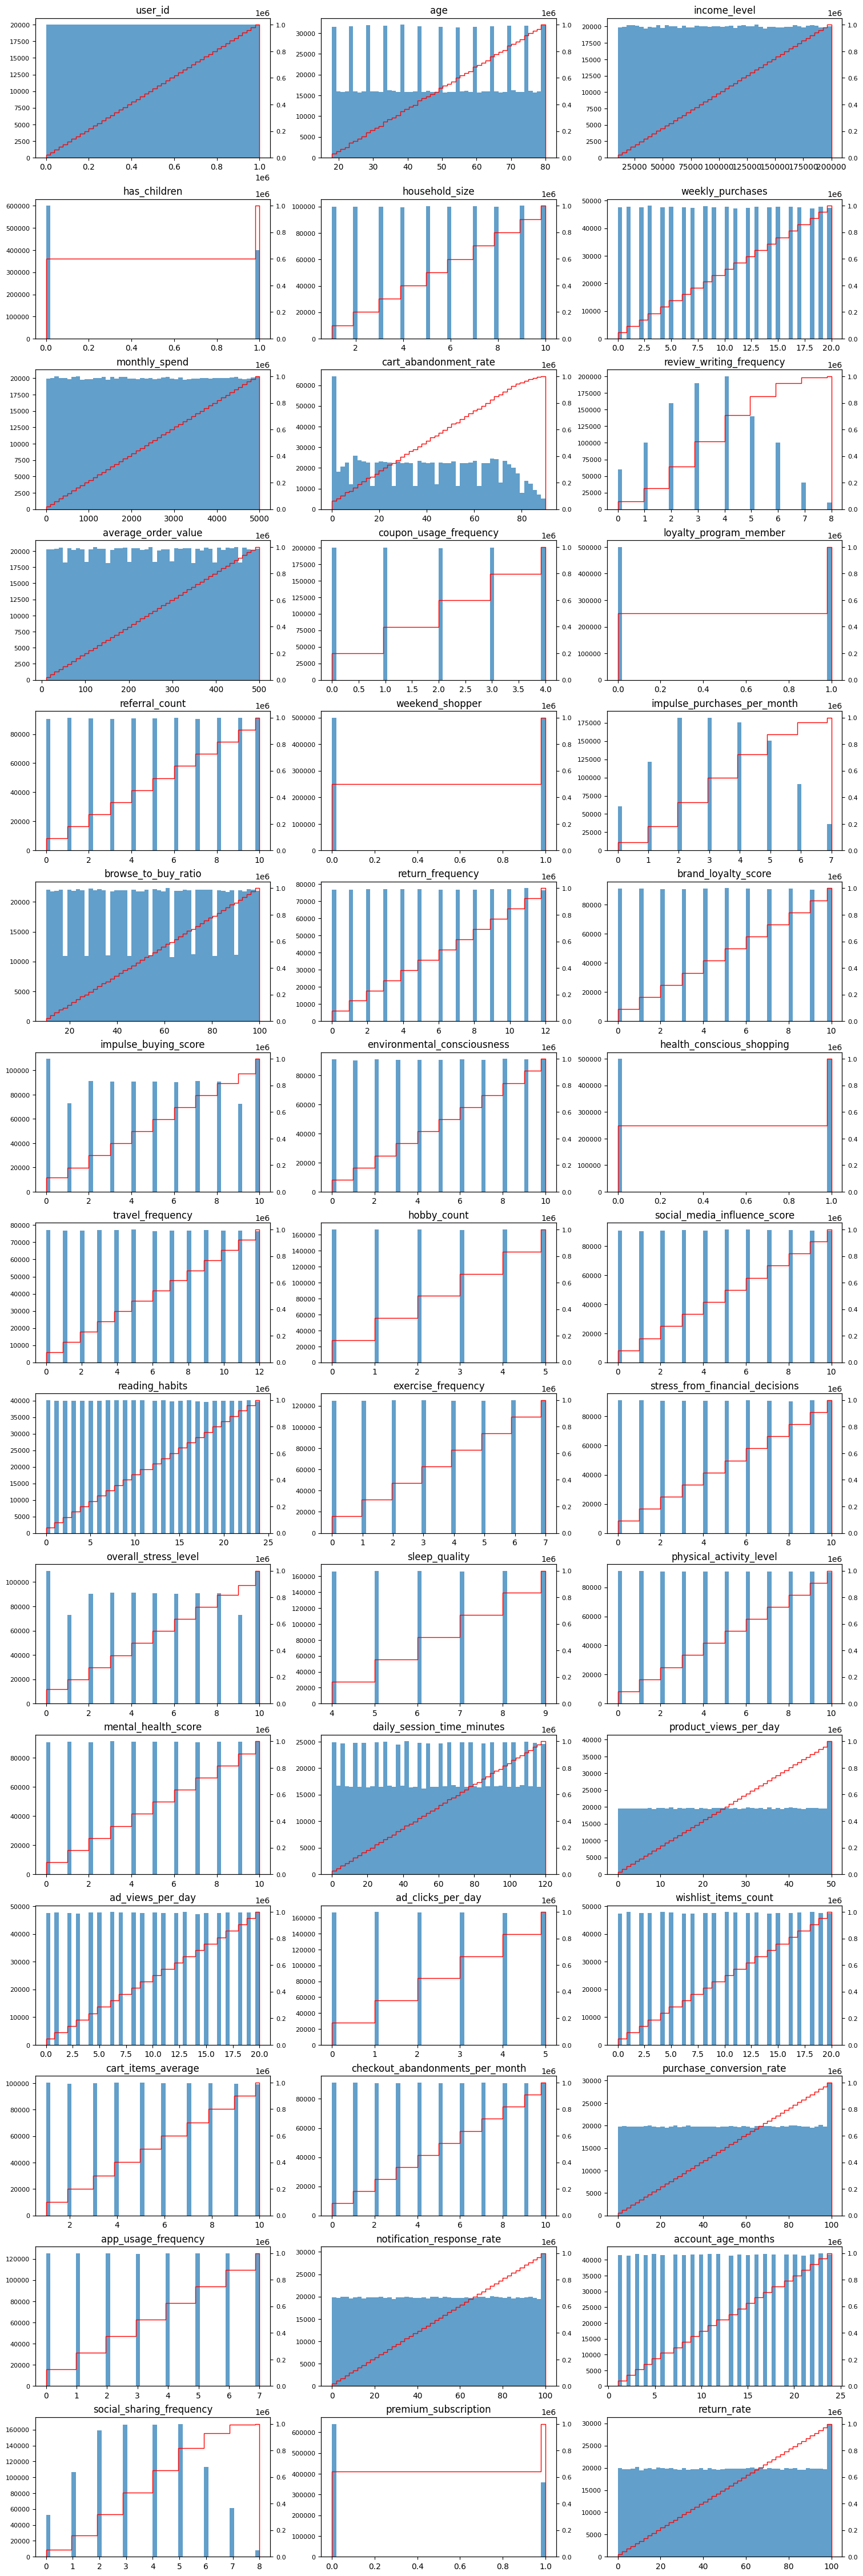

In [84]:
plot_numeric_grid(df)

In [110]:
def plot_categoric_grid(df, cols_per_row=3, bins=50):
    import math
    categorics = df.select_dtypes(include=["object"]).columns
    n_rows = math.ceil(len(categorics) / cols_per_row)

    fig, axes = plt.subplots(
        n_rows,
        cols_per_row,
        figsize=(cols_per_row * 5, n_rows * 3),
        constrained_layout=True
    )

    axes = axes.flatten()

    for ax, col in zip(axes, categorics):
        
        counts = df.groupby(col).agg('size')

        ax.bar(counts.index, counts.values)
        ax.set_title(col)

        ax.tick_params(axis='y', labelsize=8)
    
    for ax in axes[len(categorics):]:
        ax.axis("off")

    plt.show()


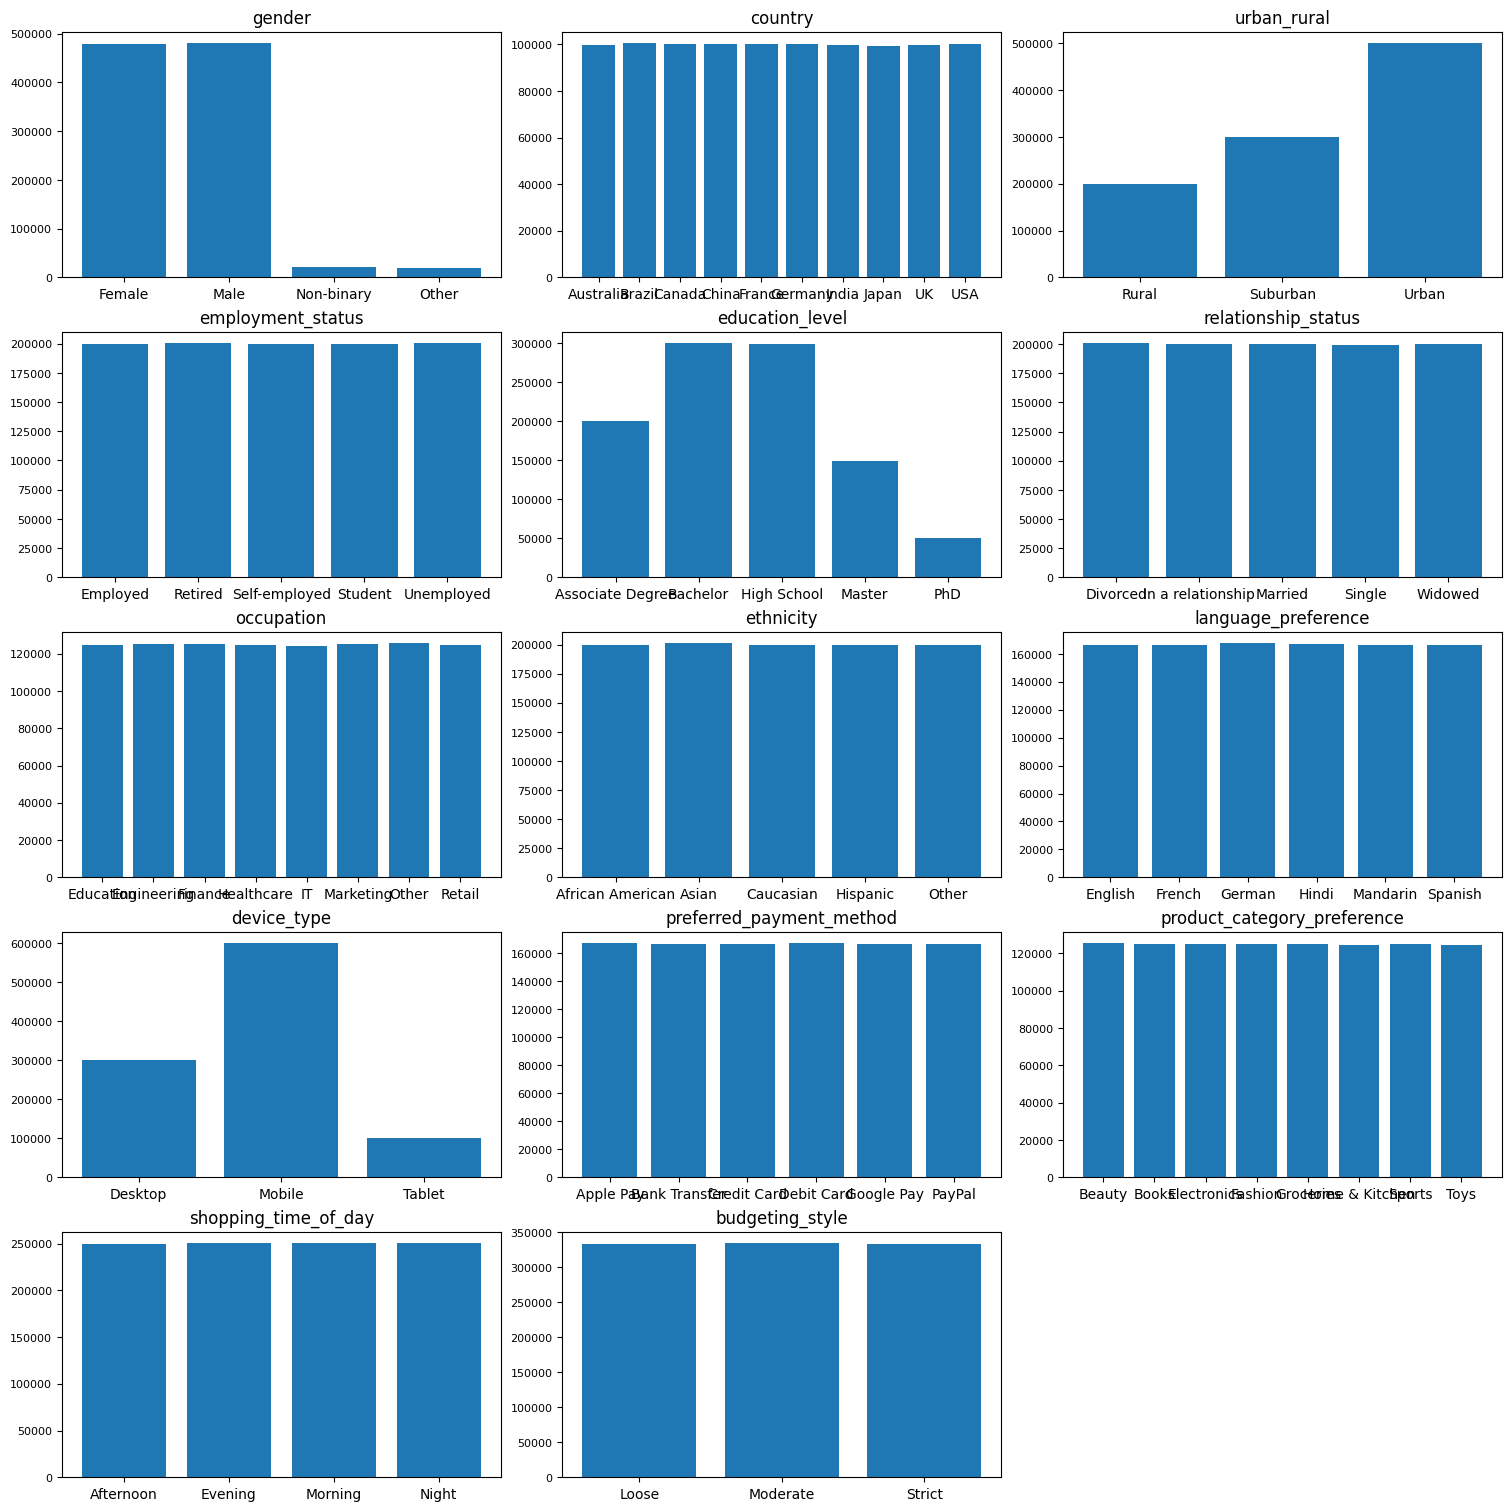

In [111]:
plot_categoric_grid(df)